# Testing DAG search

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import config
import dag_search

In [33]:
import importlib
importlib.reload(config)
importlib.reload(dag_search)

<module 'dag_search' from 'C:\\Users\\Paul Kahlmeyer\\OneDrive\\PhD\\DAG_search\\dag_search.py'>

In [4]:
# Symbolic Regression: f(x) = 0.5x, x -0.5
X = np.random.rand(100, 1)
c = 0.5
y = np.column_stack([c*X[:,0], X[:,0] - c])

m = X.shape[1]
n = y.shape[1]
k = 1

loss_fkt = dag_search.MSE_loss_fkt(y)

In [ ]:
params = {
    'X' : X,
    'n_outps' : n,
    'loss_fkt' : loss_fkt,
    'k' : k,
    'n_calc_nodes' : 1,
    'n_processes' : 1,
    'loss_thresh' : 1e-1,
    'opt_mode' : 'grid',
    'verbose' : 2,
    'max_orders' : 10000, 
    'max_size' : 10
    
}

res = dag_search.exhaustive_search(**params)

plt.plot(res['losses'])

100%|████████████████████████████████████████████████████████████████████████████| 864/864 [00:00<00:00, 118458.38it/s]


Total orders: 305
Evaluating orders


 20%|████████████████▏                                                                | 61/305 [00:12<01:18,  3.11it/s]

In [20]:
i = 7
graph = res['graphs'][i]
consts = res['consts'][i]
graph.node_dict, consts

({0: ([], 'inp'),
  1: ([], 'const'),
  2: ([1, 0], 'div_r'),
  3: ([4, 0], 'sub_r'),
  4: ([1], 'sin')},
 array([2.65306122]))

In [21]:
graph.evaluate_symbolic(c = consts)

[0.376923076923077*x_0, x_0 - 0.4693296127772]


Generating graphs


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:10<00:00, 967.79it/s]


Evaluating graphs


100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:19<00:00, 512.45it/s]


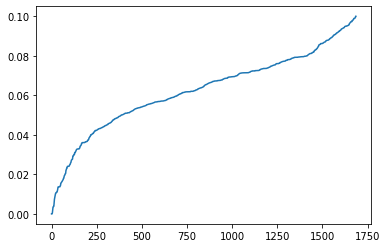

In [34]:
np.random.seed(0)
params = {
    'X' : X,
    'n_outps' : n,
    'loss_fkt' : loss_fkt,
    'k' : k,
    'n_calc_nodes' : 5,
    'n_processes' : 1,
    'loss_thresh' : 1e-1,
    'opt_mode' : 'grid',
    'verbose' : 2,
    'n_samples' : 10000
    
}
res = dag_search.sample_search(**params)

plt.plot(res['losses'])

In [41]:
i = 3
graph = res['graphs'][i]
consts = res['consts'][i]
loss = res['losses'][i]
graph.node_dict, consts, loss

({0: ([], 'inp'),
  1: ([], 'const'),
  2: ([5], 'sin'),
  3: ([1, 0], 'sub_r'),
  4: ([1, 0], '*'),
  5: ([4, 0], 'sub_r')},
 array([0.50505051]),
 5.667295264434164e-05)